In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/fraud-data/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# 1.Data cleaning including missing values, outliers and multi-collinearity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


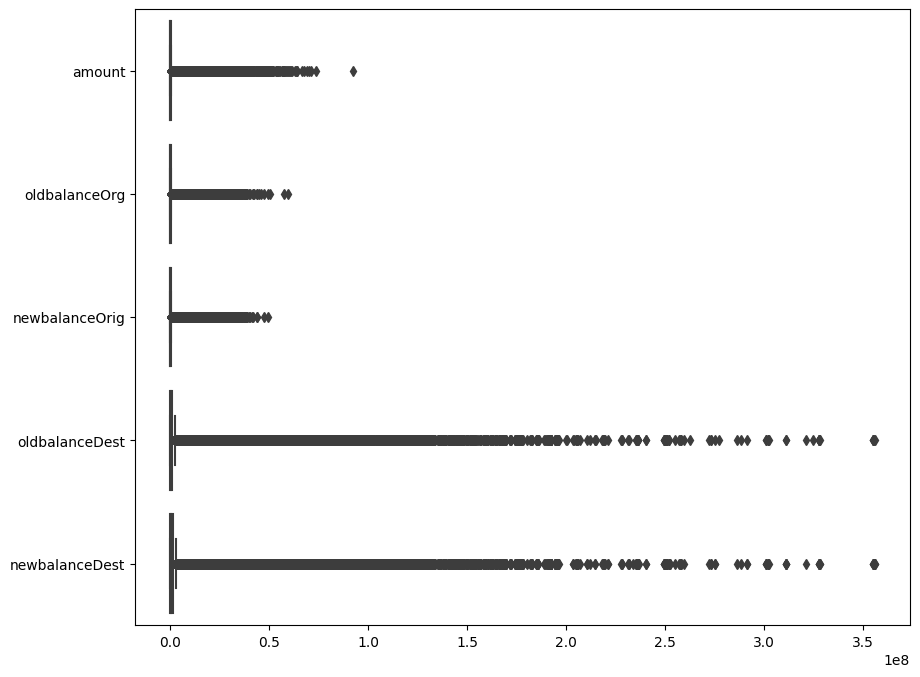

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [7]:
upper_limit=df["oldbalanceDest"].mean()+3*df["oldbalanceDest"].std()
upper_limit

11298242.005503079

In [8]:
lower_limit=df["oldbalanceDest"].mean()-3*df["oldbalanceDest"].std()
lower_limit

-9096838.67246378

In [9]:
df[(df.oldbalanceDest>upper_limit) | (df.oldbalanceDest<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
375,1,TRANSFER,2545478.01,C1057507014,0.00,0.00,C1590550415,12394437.40,19169204.93,0,0
376,1,TRANSFER,2061082.82,C2007599722,0.00,0.00,C1590550415,14939915.42,19169204.93,0,0
432,1,CASH_IN,349505.89,C173791568,7330235.59,7679741.48,C1590550415,17000998.23,19169204.93,0,0
463,1,CASH_IN,222711.47,C2123533871,2419068.96,2641780.43,C1590550415,16651492.34,19169204.93,0,0
557,1,CASH_OUT,227478.01,C1394010463,25743.78,0.00,C1590550415,16428780.87,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6361598,718,CASH_OUT,171981.42,C1590931184,288755.00,116773.58,C209941417,11775992.01,11947973.43,0,0
6361788,718,CASH_IN,356716.89,C61663991,8224.00,364940.89,C1990291115,15316484.39,14959767.50,0,0
6362134,718,TRANSFER,173136.74,C1389786150,95.00,0.00,C7891843,29636492.16,29809628.90,0,0
6362256,718,TRANSFER,139144.25,C1264043726,7075.00,0.00,C2093369248,49040158.93,49179303.19,0,0


In [10]:
df=df[(df.oldbalanceDest<upper_limit) & (df.oldbalanceDest>lower_limit)]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
upper_limit2=df["newbalanceDest"].mean()+3*df["newbalanceDest"].std()
upper_limit2

6528181.228870491

In [12]:
lower_limit2=df["newbalanceDest"].mean()-3*df["newbalanceDest"].std()
lower_limit2

-4601727.778110741

In [13]:
df[(df.newbalanceDest>upper_limit2) | (df.newbalanceDest<lower_limit2)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
94,1,TRANSFER,1724887.05,C1495608502,0.00,0.0,C1590550415,3470595.10,19169204.93,0,0
96,1,TRANSFER,581294.26,C843299092,0.00,0.0,C1590550415,5195482.15,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362577,741,CASH_OUT,10000000.00,C421958672,10000000.00,0.0,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.00,C1647199421,10000000.00,0.0,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.00,C677394894,10000000.00,0.0,C1866259073,0.00,10000000.00,1,0
6362583,741,CASH_OUT,10000000.00,C1668034607,10000000.00,0.0,C1250722530,192912.98,10192912.98,1,0


In [14]:
df=df[(df.newbalanceDest<upper_limit2) & (df.newbalanceDest>lower_limit2)]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
upper_limit3=df["oldbalanceOrg"].mean()+3*df["oldbalanceOrg"].std()
upper_limit3

9396099.797353057

In [16]:
lower_limit3=df["oldbalanceOrg"].mean()-3*df["oldbalanceOrg"].std()
lower_limit3

-7761399.42709321

In [17]:
df[(df.oldbalanceOrg>upper_limit3) | (df.oldbalanceOrg<lower_limit3)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
661,1,CASH_IN,311449.38,C1639765351,9405012.76,9716462.14,C1789550256,713512.77,4619798.56,0,0
1329,1,CASH_IN,269736.99,C540092563,9630666.58,9900403.57,C1526298704,473512.63,32092.07,0,0
1330,1,CASH_IN,18622.16,C1894698434,9900403.57,9919025.73,C1825027294,55379.84,36757.68,0,0
1331,1,CASH_IN,183816.31,C205615258,9919025.73,10102842.03,C1023714065,2391652.26,1412484.09,0,0
2951,2,CASH_IN,212291.34,C189970261,9506081.11,9718372.45,C1068824137,251192.40,45982.28,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.00,0.00,1,0
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0


In [18]:
df=df[(df.oldbalanceOrg<upper_limit3) & (df.oldbalanceOrg>lower_limit3)]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# No Outliers

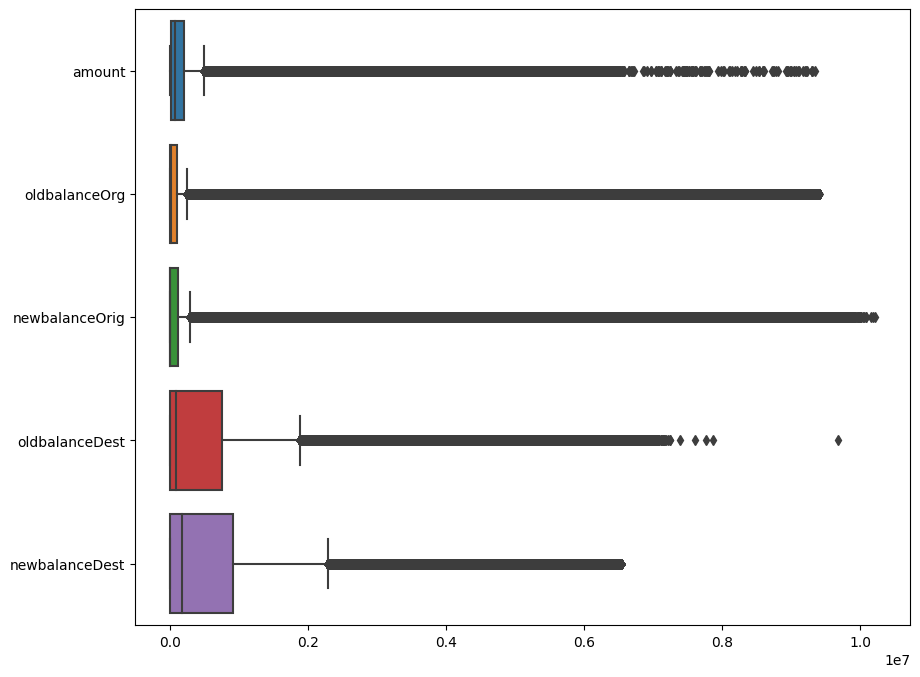

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [20]:
df["type"].value_counts()

type
PAYMENT     2151463
CASH_OUT    2126286
CASH_IN     1183271
TRANSFER     464981
DEBIT         39487
Name: count, dtype: int64

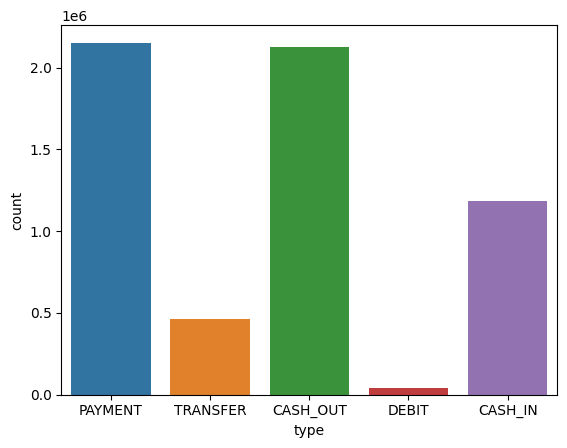

In [21]:
sns.countplot(x="type",data=df)
plt.show()

In [22]:
df["isFraud"].value_counts()

isFraud
0    5957909
1       7579
Name: count, dtype: int64

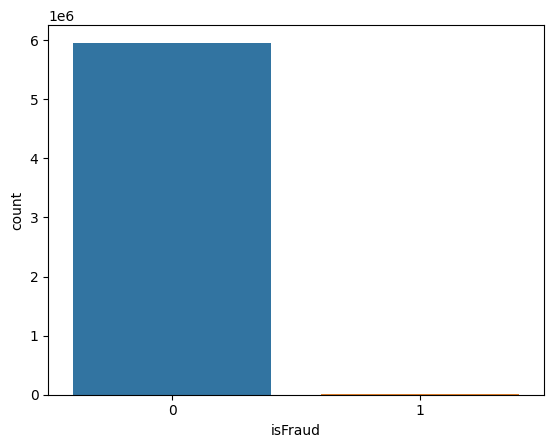

In [23]:
sns.countplot(x="isFraud",data=df)
plt.show()

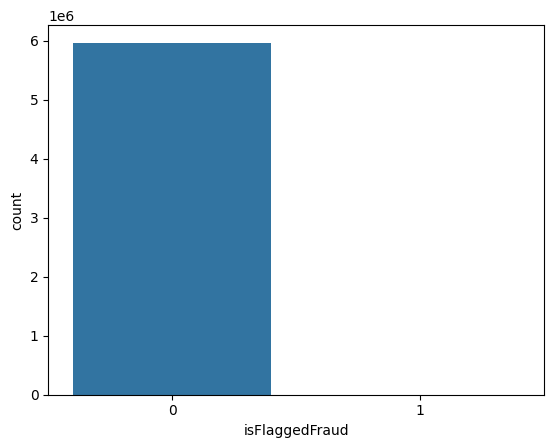

In [24]:
sns.countplot(x="isFlaggedFraud",data=df)
plt.show()

# 2. Describe your fraud detection model in elaboration.

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. How did you select variables to be included in the model?

In [26]:
df.drop(columns=["nameOrig","nameDest","nameOrig"],axis=1,inplace=True)

In [27]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)



In [28]:
bool_columns = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
df[bool_columns] = df[bool_columns].astype(int)

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [29]:
scale_data=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[scale_data] = scaler.fit_transform(df[scale_data])

In [30]:
train_data=df.drop(columns="isFraud",axis=1)
label_data=df["isFraud"]

# 4. Demonstrate the performance of the model by using best set of tools

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.2, random_state=42)

In [32]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predict=model.predict(X_test)

In [37]:
print(f"Accuracy score : {accuracy_score(y_test,predict)}")

Accuracy score : 0.9997041315969015


In [39]:
label=["Non Fraud","Fraud"]

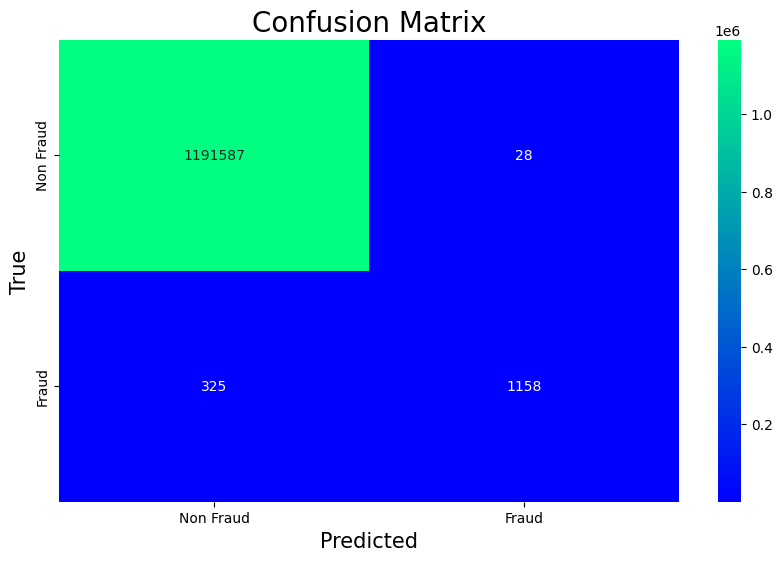

In [46]:
cf_matrix=confusion_matrix(y_test,predict)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix,annot=True,fmt="d",xticklabels=label,yticklabels=label,cmap="winter")
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("True",fontsize=15)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

In [48]:
print(classification_report(y_test,predict,target_names=label))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00   1191615
       Fraud       0.98      0.78      0.87      1483

    accuracy                           1.00   1193098
   macro avg       0.99      0.89      0.93   1193098
weighted avg       1.00      1.00      1.00   1193098



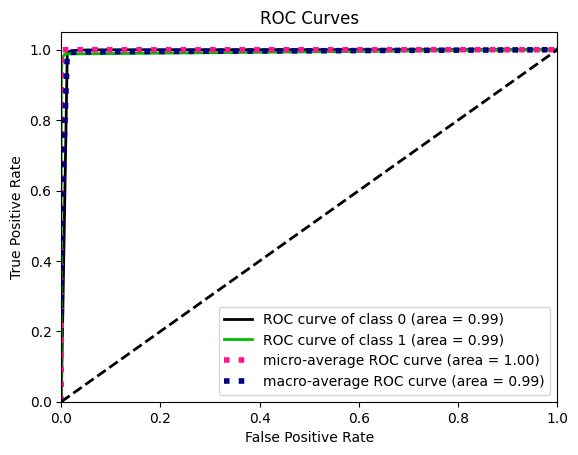

In [55]:
import scikitplot as skplt
pred= model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred)
plt.show()

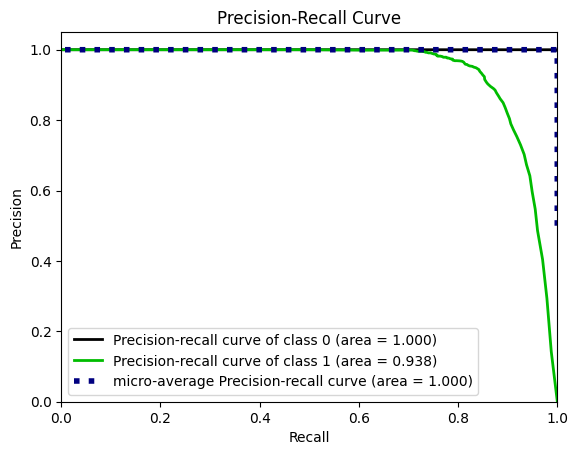

In [54]:
skplt.metrics.plot_precision_recall(y_test,pred)
plt.show()

# 5. What are the key factors that predict fraudulent customer?

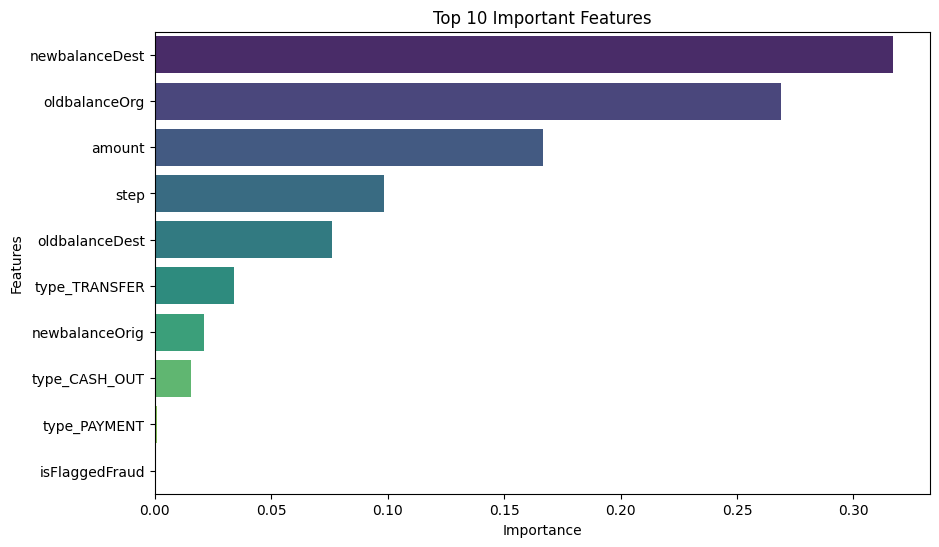

In [57]:
important_feature = pd.Series(model.feature_importances_, index=train_data.columns)
top_features = important_feature.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()

# 6. Do these factors make sense? If yes, How? If not, How not?




#### newbalanceDest: This could be important if changes in the destination account balance are significant for predicting the target variable.

#### oldbalanceOrg: The initial balance of the originating account might be crucial in understanding transaction behavior.

#### amount: The transaction amount is often a critical factor in fraud detection or any financial prediction task.

#### step: The time step or timestamp might indicate temporal patterns in the data, which could be important for predicting the target.

#### oldbalanceDest: Similar to newbalanceDest, the initial balance of the destination account may carry valuable information.

#### type_TRANSFER: If this is a binary indicator for whether the transaction is a transfer, it suggests that the nature of the transaction (transfer or not) is a significant predictor.

#### newbalanceOrig: Similar to oldbalanceOrg, the final balance of the originating account might provide important information.

#### type_CASH_OUT: Similar to type_TRANSFER, if this is an indicator for whether the transaction is a cash-out, it signifies the transaction type's importance.

#### type_PAYMENT: If this is an indicator for whether the transaction is a payment, it indicates the significance of the payment type.

#### isFlaggedFraud: If this feature indicates whether a transaction is flagged as fraud, it's a direct indicator of the fraud status, making it crucial for fraud detection.

# 7. What kind of prevention should be adopted while company update its infrastructure?

### Risk Assessment:

Conduct a comprehensive risk assessment to identify potential vulnerabilities and risks associated with the infrastructure update.
Evaluate the impact of the update on existing systems, data, and business operations.

### Backup and Recovery:

Regularly back up critical data before initiating any updates or changes.
Ensure that reliable backup and recovery mechanisms are in place to minimize data loss in case of unexpected issues during the update.

### Testing:

Implement a thorough testing process to identify and address any compatibility issues between existing systems and the updated infrastructure.
Conduct testing in a controlled environment to minimize the impact on production systems.

### Security Measures:

Prioritize cybersecurity by implementing robust security measures during the update.
Update and patch all software and firmware to address potential vulnerabilities.
Consider implementing network segmentation and access controls to limit potential security breaches.

### Communication and Training:

Communicate updates and changes effectively to all relevant stakeholders, including employees, customers, and partners.
Provide training sessions for employees to familiarize them with the updated infrastructure, new features, and any changes to existing workflows.

# 8. Assuming these actions have been implemented, how would you determine if they work?

#### Security Audits and Assessments:

Conduct regular security audits and assessments to identify vulnerabilities and ensure that security measures are effective.
Use penetration testing and vulnerability scanning to evaluate the security posture of the updated infrastructure.

#### Incident Monitoring and Response:

Implement a robust incident monitoring system to detect and respond to any security incidents or anomalies.
Evaluate the effectiveness of the incident response plan by reviewing how quickly and effectively the team can mitigate and recover from security events.

#### Performance Metrics:


Monitor key performance metrics such as system uptime, response times, and resource utilization.
Compare current performance metrics with baseline measurements to assess the impact of the infrastructure update on system efficiency.

#### User Feedback:

Gather feedback from end-users, employees, and other stakeholders regarding their experience with the updated infrastructure.
Address any reported issues and consider conducting surveys or interviews to assess user satisfaction.

#### Compliance Audits:

Regularly conduct compliance audits to ensure that the updated infrastructure continues to comply with industry regulations and data protection laws.
Keep documentation up-to-date and accurate for audit purposes.